### 네이버 메뉴 추출
- 방법: 크롬 개발자 도구 이용
- 전체 소스 코드에서 위치 찾아(화면 해당 컨텐츠에서 단축메뉴 검사 이용)
- 태그 확인하고 태그 추출
- 동일태그가 여러개인 경우 class 속성 이용해서 추출

In [27]:
import requests
from urllib.request import urlopen
import bs4
from bs4 import BeautifulSoup

In [28]:
url="https://www.naver.com/"


# url 에 접속
html=urlopen(url)
type(html)

http.client.HTTPResponse

b'\n<!doctype html>                          <html lang="ko" data-dark="false"> <head> <meta charset="utf-8"> <title>NAVER</title> <meta http-equiv="X-UA-Compatible" content="IE=edge"> <meta name="viewport" content="width=1190"> <meta name="apple-mobile-web-app-title" content="NAVER"/> <meta name="robots" content="index,nofollow"/> <meta name="description" content="\xeb\x84\xa4\xec\x9d\xb4\xeb\xb2\x84 \xeb\xa9\x94\xec\x9d\xb8\xec\x97\x90\xec\x84\x9c \xeb\x8b\xa4\xec\x96\x91\xed\x95\x9c \xec\xa0\x95\xeb\xb3\xb4\xec\x99\x80 \xec\x9c\xa0\xec\x9a\xa9\xed\x95\x9c \xec\xbb\xa8\xed\x85\x90\xec\xb8\xa0\xeb\xa5\xbc \xeb\xa7\x8c\xeb\x82\x98 \xeb\xb3\xb4\xec\x84\xb8\xec\x9a\x94"/> <meta property="og:title" content="\xeb\x84\xa4\xec\x9d\xb4\xeb\xb2\x84"> <meta property="og:url" content="https://www.naver.com/"> <meta property="og:image" content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png"> <meta property="og:description" content="\xeb\x84\xa4\xec\x9d\xb4\xeb\xb2
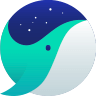
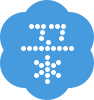

In [23]:
html.read() # 생략하고 response 객체를 바로 파서기에 적용해도 됨

In [29]:
# 파서에 등록해 obj로 변환
bs_obj=bs4.BeautifulSoup(html,"html.parser")

In [30]:
# 첫 번쨰 메뉴 블럭 파싱(ul class: list_nav type_fix)

ul=bs_obj.find("ul",{"class":"list_nav type_fix"})
print(type(ul))
print(ul)
# 위에서 추출한 ul객체는 bs4.element.Tag 임
## 집합적 자료의 속성을 갖고 있기 때문에 반복요소로 사용 가능
for li in ul:
    print(li)

<class 'bs4.element.Tag'>
<ul class="list_nav type_fix">
<li class="nav_item">
<a class="nav" data-clk="svc.mail" href="https://mail.naver.com/"><i class="ico_mail"></i>메일</a>
</li>
<li class="nav_item"><a class="nav" data-clk="svc.cafe" href="https://section.cafe.naver.com/">카페</a></li>
<li class="nav_item"><a class="nav" data-clk="svc.blog" href="https://section.blog.naver.com/">블로그</a></li>
<li class="nav_item"><a class="nav" data-clk="svc.kin" href="https://kin.naver.com/">지식iN</a></li>
<li class="nav_item"><a class="nav shop" data-clk="svc.shopping" href="https://shopping.naver.com/"><span class="blind">쇼핑</span></a></li>
<li class="nav_item"><a class="nav shoplive" data-clk="svc.shoppinglive" href="https://shoppinglive.naver.com/home"><span class="blind">쇼핑LIVE</span></a></li>
<li class="nav_item"><a class="nav" data-clk="svc.pay" href="https://order.pay.naver.com/home">Pay</a></li>
<li class="nav_item">
<a class="nav" data-clk="svc.tvcast" href="https://tv.naver.com/"><i class="

In [31]:
# finnall 함수 사용해서 ul안의 모든 li를 추출
lis=ul.findAll("li")
print(lis)

[<li class="nav_item">
<a class="nav" data-clk="svc.mail" href="https://mail.naver.com/"><i class="ico_mail"></i>메일</a>
</li>, <li class="nav_item"><a class="nav" data-clk="svc.cafe" href="https://section.cafe.naver.com/">카페</a></li>, <li class="nav_item"><a class="nav" data-clk="svc.blog" href="https://section.blog.naver.com/">블로그</a></li>, <li class="nav_item"><a class="nav" data-clk="svc.kin" href="https://kin.naver.com/">지식iN</a></li>, <li class="nav_item"><a class="nav shop" data-clk="svc.shopping" href="https://shopping.naver.com/"><span class="blind">쇼핑</span></a></li>, <li class="nav_item"><a class="nav shoplive" data-clk="svc.shoppinglive" href="https://shoppinglive.naver.com/home"><span class="blind">쇼핑LIVE</span></a></li>, <li class="nav_item"><a class="nav" data-clk="svc.pay" href="https://order.pay.naver.com/home">Pay</a></li>, <li class="nav_item">
<a class="nav" data-clk="svc.tvcast" href="https://tv.naver.com/"><i class="ico_tv"></i>TV</a>
</li>]


In [74]:
# 각 li 태그 내부의 a 태그 접근후 text 출력

for li in lis:
    a_tag=li.find("a")
    print( a_tag.text,end=",")

사전,뉴스,증권,부동산,지도,VIBE,책,웹툰,

In [75]:
ul1=bs_obj.find("ul",{"class":"list_nav NM_FAVORITE_LIST"})
url
lis=ul1.findAll("li")
for li in lis:
    a_tag=li.find("a")
    print( a_tag.text,end=",")
    
    
# 코드재확인

AttributeError: 'NoneType' object has no attribute 'findAll'

# 네이버 뉴스 크롤링

In [40]:
url="https://news.naver.com/"

# url 에 접속
html=urlopen(url)
type(html)

RemoteDisconnected: Remote end closed connection without response

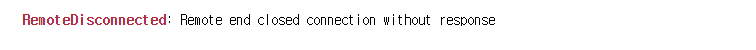

#### 에러가 나는 이유 !!맨 처음을 보면 

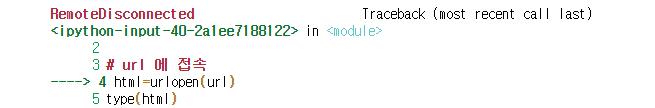

#### RemoteDisconnected  라는 에러가 나옴 이건 브라우저가 아니라 프로그램을 통해서 접근할경우 나온다.


#### 프로그램을 통해 자동화된 bot로 인식하고 연결을 끊어버림~!!


### 해결방안

- 위 코드 처럼 자동화 봇으로 보고 연결을 끊는 경우에는 데이터 전송시 추가되는 header를 구성해 bot이 아님을 증명해야 함
    - header에는 브라우저를 통한 접속이라는 정보를 포함시킨다
    - 크롬 개발자도구 => NetWork => news.naver.com 선택한 후 오른쪽에 새로나타나는 창에서 header 선택
    - requests headers 목록에서 user-agent 확인
- https://developers.whatismybrowser.com/useragents/explore/software_name/chrome/


In [83]:
# header 전송은 보통 requests 객체를 사용함
import requests 

headers={"User-Agent":
       "Mozilla/5.0(Window NT 10.0;Win64;x64) AppleWebKit/537.36 (KHTML,likeGecko) Chrome/87.0.4280.88 Safari/537.36"
}


url="https://news.naver.com/"
res=requests.get(url,headers=headers)  #herders=herders 뒤의 herders가 변수이다!!
html=res.text
html[:100]

'\n\n\n\n\n\n\n\n\n\n\n\t\n\t\t\n\t\n\t\n\n\n<!DOCTYPE HTML>\n<html lang="ko">\n<head>\n<meta charset="euc-kr">\n<meta http-equ'

In [99]:
bs_obj=bs4.BeautifulSoup(html,"html.parser")
bs_obj


<!DOCTYPE HTML>

<html lang="ko">
<head>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta contents="always" name="referrer"/>
<meta content="600" http-equiv="refresh">
<meta content="width=1106" name="viewport">
<meta content="네이버 뉴스" property="og:title"/>
<meta content="website" property="og:type"/>
<meta content="http://news.naver.com/main/home.naver" property="og:url"/>
<meta content="https://ssl.pstatic.net/static.news/image/news/ogtag/navernews_200x200_20160804.png" property="og:image">
<meta content="정치, 경제, 사회, 생활/문화, 세계, IT/과학 등 언론사별, 분야별 뉴스 기사 제공" property="og:description"/>
<meta content="네이버" property="og:article:author">
<meta content="summary" name="twitter:card"/>
<meta content="네이버 뉴스" name="twitter:title"/>
<meta content="네이버 뉴스" name="twitter:site"/>
<meta content="네이버 뉴스" name="twitter:creator"/>
<meta content="https://ssl.pstatic.net/static.news/image/news/ogtag/navernews_200x200_20160804.png" name="twitter:image"/>
<meta content=

In [85]:
# 헤드라인 뉴스의 구성 ul,class:hdline_article_list
news_list= bs_obj.find("ul",{"hdline_article_list"})
# news_list

# 모든 li 추출
lis =news_list.findAll("li")

# 뉴스 제목 출력:
for li in lis:
    a_tag=li.find("a")
    print(a_tag.text.strip())

송영길 “개성공단에 미국도 투자해야…北을 ‘제2의 베트남’으로”
뉴욕검찰 "주지사 성추행 사실"…벼랑 끝 몰린 쿠오모
SK이노베이션 배터리 사업 분할···10월 1일 신설법인 출범
아동학대 대응 재원 일원화...내년 예산도 증액
'오딘'에 울고 웃는 카카오게임즈, 2분기 영업익 81억 원···전년대비 49.5% 감소


In [96]:
news_list= bs_obj.find("ul",{"hdline_article_list"})
news_list

<ul class="hdline_article_list">
<li>
<div class="hdline_article_tit">
<a class="lnk_hdline_article nclicks('mai.text1', '880000E7_000000000000000005002518', 'airsGParam', '0', 'news_global_v2.0', 'WbZ8dayTPLGZgePu')" href="/main/read.naver?mode=LSD&amp;mid=shm&amp;sid1=100&amp;oid=018&amp;aid=0005002518">
                                        송영길 “개성공단에 미국도 투자해야…北을 ‘제2의 베트남’으로”
                                    </a>
</div>
<div class="hdline_cluster_more">
<a class="lnk_hdline_cluster_more nclicks('mai.clu', '880000E7_000000000000000005002518', 'airsGParam', '0', 'news_global_v2.0', 'WbZ8dayTPLGZgePu')" href="/main/clusterArticles.naver?id=c_202108040920_00000003&amp;mode=LSD&amp;mid=shm&amp;oid=018&amp;aid=0005002518">
<span class="blind">관련기사 개수</span>
<span class="cluster_more_icon_num">17</span>
</a>
</div>
</li>
<li>
<div class="hdline_article_tit">
<a class="lnk_hdline_article nclicks('mai.text1', '8800011C_000000000000000000912280', 'airsGParam', '0', 'news_global_v2.0', 'W

In [98]:
# 모든 li 추출
lis =news_list.findAll("li")
lis

[<li>
 <div class="hdline_article_tit">
 <a class="lnk_hdline_article nclicks('mai.text1', '880000E7_000000000000000005002518', 'airsGParam', '0', 'news_global_v2.0', 'WbZ8dayTPLGZgePu')" href="/main/read.naver?mode=LSD&amp;mid=shm&amp;sid1=100&amp;oid=018&amp;aid=0005002518">
                                         송영길 “개성공단에 미국도 투자해야…北을 ‘제2의 베트남’으로”
                                     </a>
 </div>
 <div class="hdline_cluster_more">
 <a class="lnk_hdline_cluster_more nclicks('mai.clu', '880000E7_000000000000000005002518', 'airsGParam', '0', 'news_global_v2.0', 'WbZ8dayTPLGZgePu')" href="/main/clusterArticles.naver?id=c_202108040920_00000003&amp;mode=LSD&amp;mid=shm&amp;oid=018&amp;aid=0005002518">
 <span class="blind">관련기사 개수</span>
 <span class="cluster_more_icon_num">17</span>
 </a>
 </div>
 </li>,
 <li>
 <div class="hdline_article_tit">
 <a class="lnk_hdline_article nclicks('mai.text1', '8800011C_000000000000000000912280', 'airsGParam', '0', 'news_global_v2.0', 'WbZ8dayTPLGZgePu'

In [104]:
# 뉴스 제목 출력:
for li in lis:
    a_tag=li.find("a")
    print(a_tag.text.strip())

송영길 “개성공단에 미국도 투자해야…北을 ‘제2의 베트남’으로”
뉴욕검찰 "주지사 성추행 사실"…벼랑 끝 몰린 쿠오모
SK이노베이션 배터리 사업 분할···10월 1일 신설법인 출범
아동학대 대응 재원 일원화...내년 예산도 증액
'오딘'에 울고 웃는 카카오게임즈, 2분기 영업익 81억 원···전년대비 49.5% 감소


In [105]:
# 관련기사 링크 list에 저장
link_list=[]
for li in lis:
    a_tag=li.find("a")
    link_list.append("https://news.naver.com/"+a_tag["href"])
print(link_list)
    

['https://news.naver.com//main/read.naver?mode=LSD&mid=shm&sid1=100&oid=018&aid=0005002518', 'https://news.naver.com//main/read.naver?mode=LSD&mid=shm&sid1=104&oid=055&aid=0000912280', 'https://news.naver.com//main/read.naver?mode=LSD&mid=shm&sid1=101&oid=011&aid=0003945599', 'https://news.naver.com//main/read.naver?mode=LSD&mid=shm&sid1=101&oid=215&aid=0000976056', 'https://news.naver.com//main/read.naver?mode=LSD&mid=shm&sid1=105&oid=032&aid=0003089768']


In [ ]:
# 연습문제
# 네이버 뉴스 메인페이지의 5개 색션의 헤드라인 기사의 타이틀과 링크주소를 수집해서 df으로 작성